In [23]:
import pandas as pd
pd.options.display.max_rows = 50
pd.options.display.max_columns = None

import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams["figure.figsize"] = 20, 6

In [2]:
cols = ['csn', 'date', 'article', 'salesquantity', 'price']
df = pd.read_csv('parsed_transactions.csv', usecols=cols)
df.head()

,csn,date,article,salesquantity,price
0,Y2NgaWJoYw==,2018-03-02,10020163,2.0,18250.0
1,Y2NgaWJoYw==,2018-03-04,10026562,3.0,13000.0
2,Y2NgaWJoYw==,2018-03-04,10320883,2.0,43000.0
3,Y2NgaWlpYA==,2018-02-27,10013531,1.0,17800.0
4,Y2NgaWlpYA==,2018-02-27,10015613,1.0,5600.0


In [3]:
# Add additional cols
df['date'] = pd.to_datetime(df['date'])
df['revenue'] = df.apply(lambda x: x.price * x.salesquantity, axis=1)

df.head()

,csn,date,article,salesquantity,price,revenue
0,Y2NgaWJoYw==,2018-03-02,10020163,2.0,18250.0,36500.0
1,Y2NgaWJoYw==,2018-03-04,10026562,3.0,13000.0,39000.0
2,Y2NgaWJoYw==,2018-03-04,10320883,2.0,43000.0,86000.0
3,Y2NgaWlpYA==,2018-02-27,10013531,1.0,17800.0,17800.0
4,Y2NgaWlpYA==,2018-02-27,10015613,1.0,5600.0,5600.0


In [4]:
df_timeseries = df.sort_values(by='date').groupby('date') \
.agg(salesquantity = ('salesquantity', 'sum'), revenue= ('revenue', 'sum')) \
.reset_index().set_index('date').asfreq('D')

In [6]:
# Fill missing data
df_timeseries['salesquantity'].fillna(0, inplace=True)
df_timeseries['revenue'].fillna(0, inplace=True)

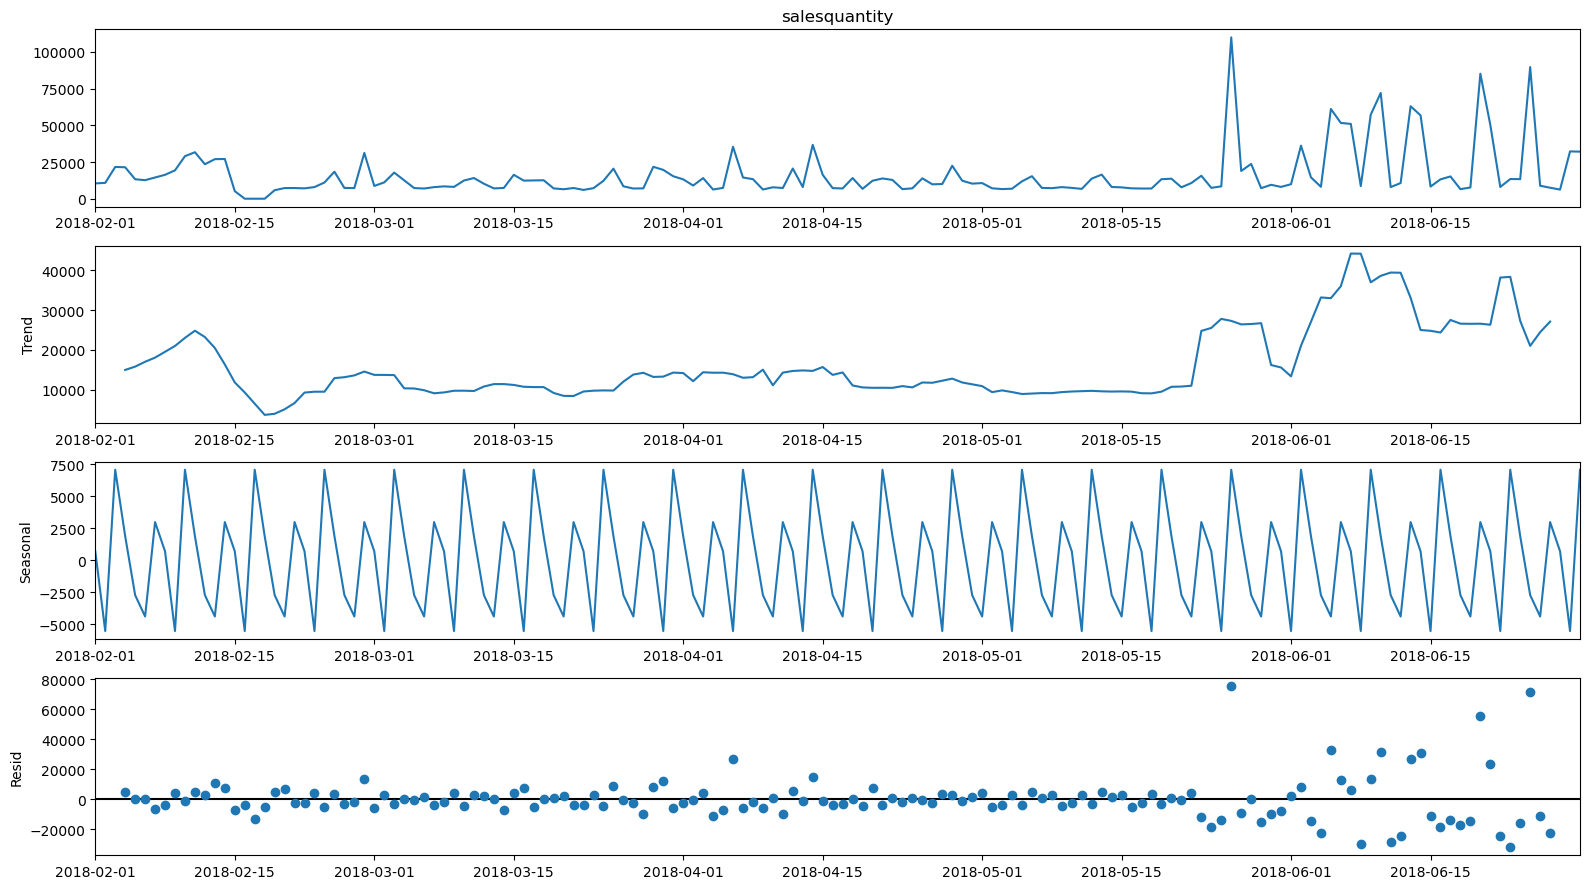

In [7]:
decomposition = sm.tsa.seasonal_decompose(df_timeseries['salesquantity'], model='additive')
decomposition_plot = decomposition.plot()
decomposition_plot.set_size_inches((16, 9))
decomposition_plot.tight_layout()
plt.show()

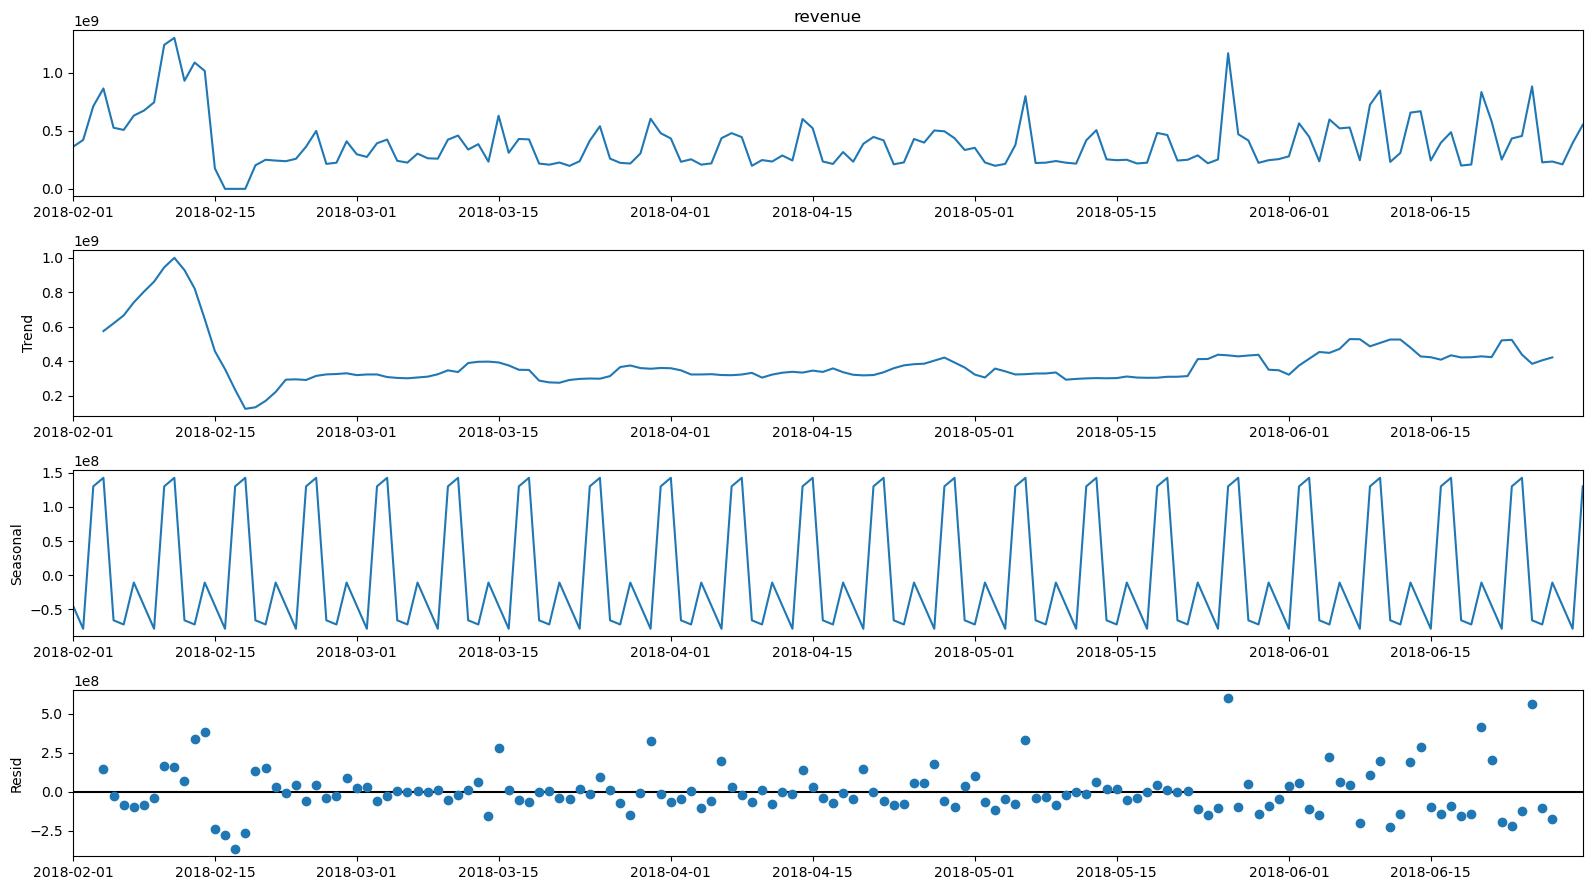

In [8]:
decomposition = sm.tsa.seasonal_decompose(df_timeseries['revenue'], model='additive')
decomposition_plot = decomposition.plot()
decomposition_plot.set_size_inches((16, 9))
decomposition_plot.tight_layout()
plt.show()

In [ ]:
df.sort_values(by='date').groupby('article').price.max().sort_values(ascending=True)

<Axes: xlabel='revenue'>

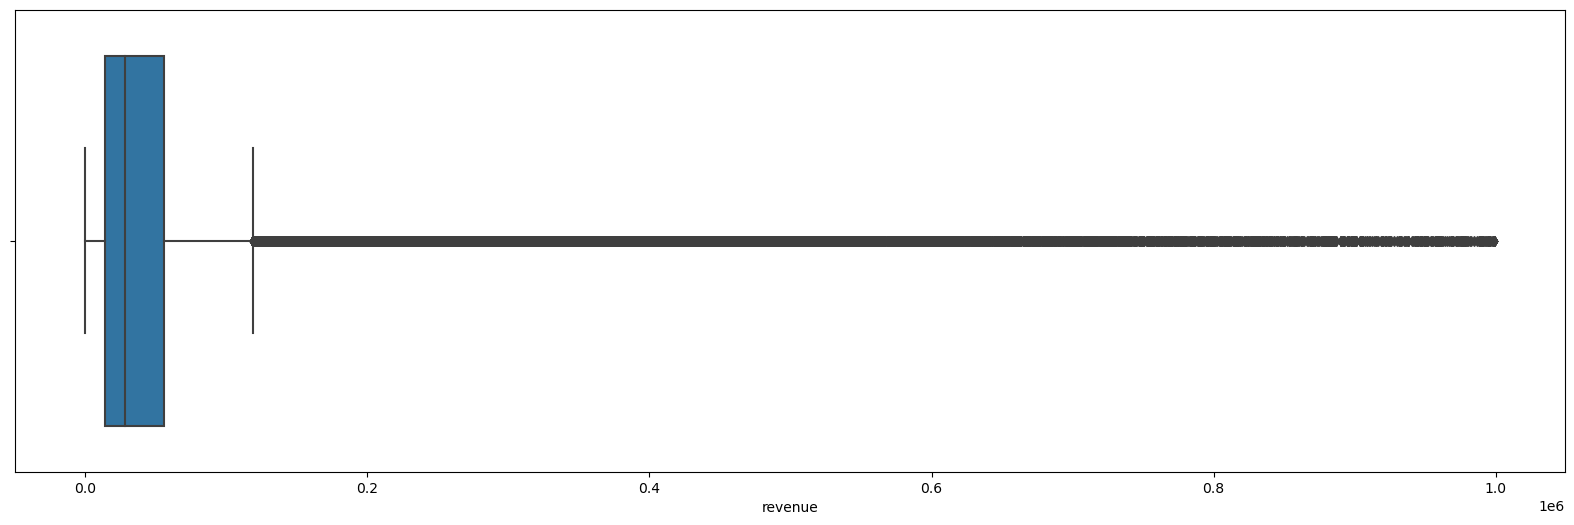

In [14]:
sns.boxplot(df[df['revenue'] < 1000000], x='revenue')

In [10]:
df['revenue'].describe()

count    9.935120e+05
mean     5.919714e+04
std      9.776569e+05
min      1.140000e+02
25%      1.390000e+04
50%      2.850000e+04
75%      5.610000e+04
max      4.474500e+08
Name: revenue, dtype: float64

<Axes: xlabel='revenue', ylabel='Count'>

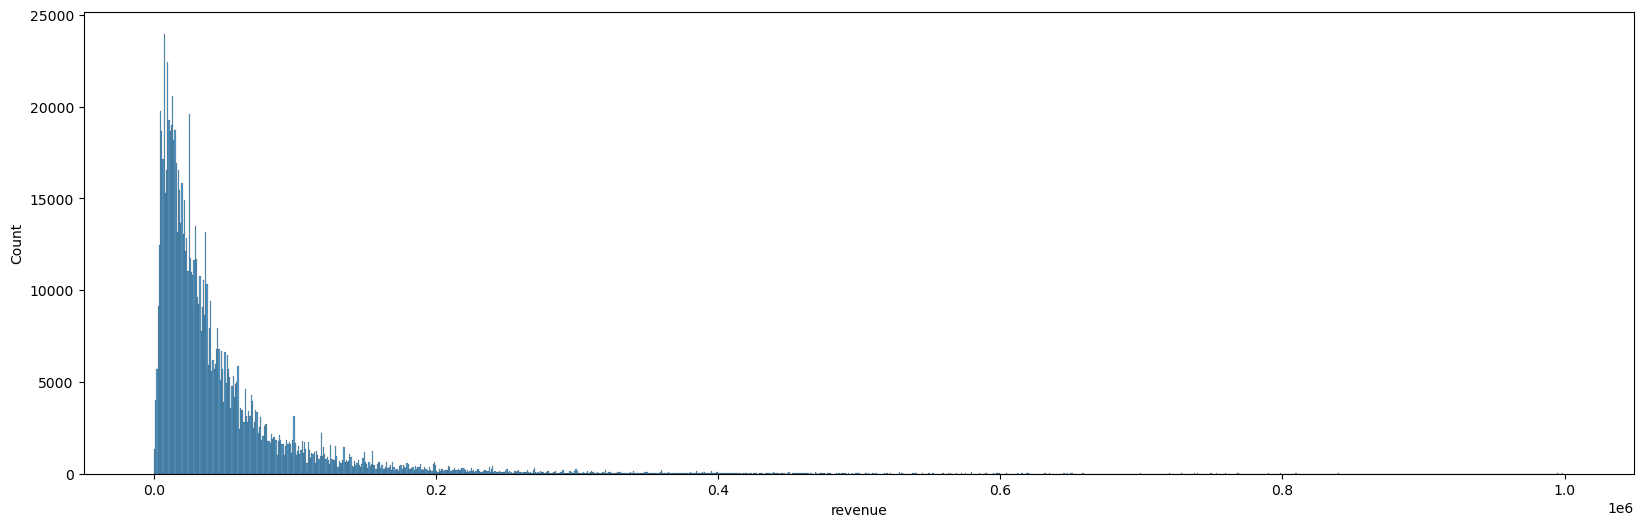

In [17]:
sns.histplot(df[df['revenue'] < 1000000]['revenue'])

In [ ]:
df.groupby(['csn', 'date'], as_index=False)['salesquantity'].sum().sort_values(by=['csn', 'date'], ascending=True)

In [76]:
top_users = df.groupby(['csn'], as_index=False)['salesquantity'].sum().nlargest(10, columns=['salesquantity'])
top_users
# list(top_users['csn'])

,csn,salesquantity
9758,ZGdibWdr,884969.696
4285,YmVicWNnYA==,18384.000
9290,ZGZncGJp,15393.000
12161,ZGtgbmlq,12121.000
4307,YmVjamNoYw==,9853.000
17827,ZmlhbWdk,3844.000
16416,ZWtkampnZQ==,3411.699
8458,ZGRgbWhrZg==,2436.638
14256,ZWVnaGNsZA==,2236.188
17554,ZmVpa2hk,2142.124


In [85]:
user_id = list(top_users['csn'])[0]
user_timeseries = df[df['csn'] == user_id].sort_values(by='date').groupby('date', as_index=False) \
['salesquantity'].sum().set_index('date').asfreq('D')
user_timeseries.fillna(0, inplace=True)
user_timeseries

,salesquantity
date,
2018-02-03,4800.0
2018-02-04,0.0
2018-02-05,0.0
2018-02-06,0.0
2018-02-07,0.0
...,...
2018-06-26,0.0
2018-06-27,0.0
2018-06-28,0.0


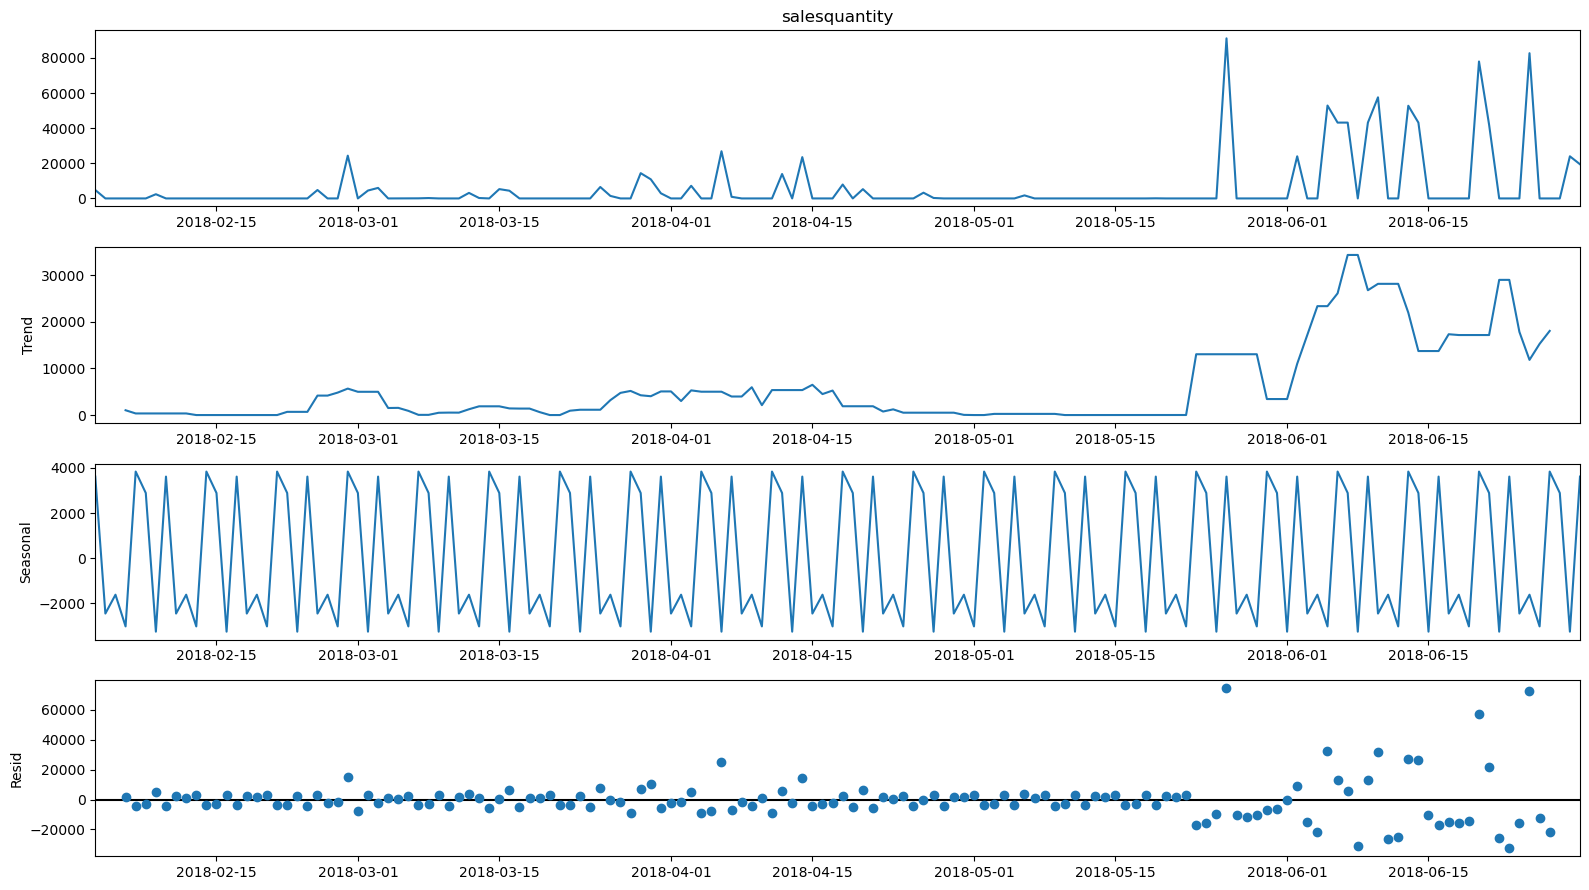

In [86]:
decomposition = sm.tsa.seasonal_decompose(user_timeseries['salesquantity'], model='additive')
decomposition_plot = decomposition.plot()
decomposition_plot.set_size_inches((16, 9))
decomposition_plot.tight_layout()
plt.show()